In [2]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
prop_df = pd.read_csv("../data/curated/prop_by_sa2.csv")
income_df = pd.read_csv("../data/curated/vic_income_by_sa2.csv")

# drop irrelevant columns
prop_df = prop_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index_right'])
income_df = income_df.drop(columns=['Unnamed: 0'])

In [4]:
income_df.loc[income_df['Earners 2019'] == 'np']

,SA2,SA2 NAME,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Earners 2019,Median Age 2015,Median Age 2016,Median Age 2017,...,Median $ 2015,Median $ 2016,Median $ 2017,Median $ 2018,Median $ 2019,Mean $ 2015,Mean $ 2016,Mean $ 2017,Mean $ 2018,Mean $ 2019
82,205021083,Lake King,np,np,np,np,np,np,np,np,...,np,np,np,np,np,np,np,np,np,np


In [5]:
income_df = income_df.replace(['np'],'0')

#convert data types
convert_dic = {'Earners 2015': int, 
            'Earners 2016': int, 
            'Earners 2017': int, 
            'Earners 2018': int, 
            'Earners 2019': int, 
            'Mean $ 2015': int, 
            'Mean $ 2016': int, 
            'Mean $ 2017': int, 
            'Mean $ 2018': int, 
            'Mean $ 2019': int }

income_df = income_df.astype(convert_dic)

In [6]:
#extract lastest income data (2019)
income2019 = income_df[['SA2', 'SA2 NAME', 'Earners 2019', 'Median Age 2019', 'Mean $ 2019']]

convert_dic = {'Earners 2019': int, 
            'Median Age 2019': int, 
            'Mean $ 2019': int }

income2019 = income2019.astype(convert_dic)
income2019.dtypes

SA2                 int64
SA2 NAME           object
Earners 2019        int64
Median Age 2019     int64
Mean $ 2019         int64
dtype: object

In [7]:
# create monthly income by sa2
income2019['Mean Weekly $ 2019'] = income2019['Mean $ 2019']/52
income2019['Mean Weekly $ 2019'] = income2019['Mean Weekly $ 2019'].round(1)
income2019

,SA2,SA2 NAME,Earners 2019,Median Age 2019,Mean $ 2019,Mean Weekly $ 2019
0,201011001,Alfredton,7989,42,63668,1224.4
1,201011002,Ballarat,7595,47,77876,1497.6
2,201011003,Ballarat - North,13598,43,60367,1160.9
3,201011004,Ballarat - South,12722,40,50778,976.5
4,201011005,Buninyong,4249,46,63258,1216.5
...,...,...,...,...,...,...
457,217031476,Otway,2360,51,46448,893.2
458,217041477,Moyne - East,4081,46,55573,1068.7
459,217041478,Moyne - West,5852,48,55547,1068.2
460,217041479,Warrnambool - North,13157,43,56099,1078.8


In [8]:
rent_income_sa2 = pd.merge(prop_df, income2019, how='left', left_on=['SA2 code'], right_on=['SA2'])

In [9]:
rent_income_sa2.drop(['SA2', 'SA2 NAME'], axis=1)

,cost_text,property_type,Longitude,Latitude,New_Coordinates,SA2 code,SA2 name,Earners 2019,Median Age 2019,Mean $ 2019,Mean Weekly $ 2019
0,33.000000,House,-38.169793,146.257828,POINT (146.2578282 -38.1697927),205041095,Moe - Newborough,8017.0,44.0,56148.0,1079.8
1,40.000000,Apartment / Unit / Flat,-37.850119,144.992002,POINT (144.9920021 -37.8501194),206061136,Prahran - Windsor,15150.0,34.0,88528.0,1702.5
2,46.153846,House,-37.802927,144.960623,POINT (144.9606235 -37.802927),206041117,Carlton,9422.0,30.0,59791.0,1149.8
3,55.000000,Apartment / Unit / Flat,-37.815716,144.952956,POINT (144.9529559 -37.8157157),206041505,Melbourne CBD - West,NaN,NaN,NaN,NaN
4,60.000000,Apartment / Unit / Flat,-37.815014,144.953869,POINT (144.9538694 -37.8150137),206041505,Melbourne CBD - West,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6578,3750.000000,Townhouse,-37.822397,144.938237,POINT (144.938237 -37.8223967),206041118,Docklands,11263.0,32.0,71476.0,1374.5
6579,3750.000000,Apartment / Unit / Flat,-37.830116,144.956904,POINT (144.9569041 -37.8301164),206051512,South Melbourne,NaN,NaN,NaN,NaN
6580,4500.000000,Apartment / Unit / Flat,-37.814172,144.974005,POINT (144.9740049 -37.8141725),206041503,Melbourne CBD - East,NaN,NaN,NaN,NaN
6581,5000.000000,House,-38.372703,144.785690,POINT (144.7856897 -38.372703),214021383,Point Nepean,10772.0,50.0,61551.0,1183.7


In [10]:
rent_income_sa2 = rent_income_sa2.rename({'Mean Weekly $ 2019': 'weekly_income'}, axis=1)

In [11]:
rent_income_sa2['num_property_type'] = rent_income_sa2['property_type']
rent_income_sa2['num_property_type'].replace(['House', 'Apartment / Unit / Flat', 'Studio', 'Semi-Detached',
       'Townhouse', 'Villa', 'Terrace', 'New Apartments / Off the Plan',
       'Acreage / Semi-Rural', 'Duplex', 'Rural'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

## <font color='brown'>Visualization</font>

In [12]:
# create agg income by sa2
earner_df = income_df[['Earners 2015', 'Earners 2016', 'Earners 2017', 'Earners 2018', 'Earners 2019']]
mean_income_df = income_df[['Mean $ 2015', 'Mean $ 2016', 'Mean $ 2017', 'Mean $ 2018', 'Mean $ 2019']]
earner_df = earner_df.mean().reset_index()
mean_income_df = mean_income_df.mean().reset_index()

Text(0.5, 1.0, 'Correlation Between Income by SA2 and Rental Price')

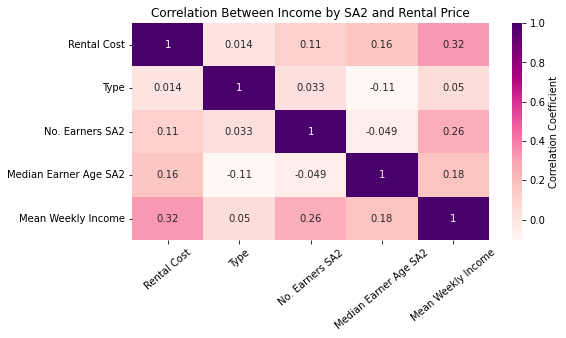

In [14]:
col_name = ['cost_text', 'num_property_type', 'Earners 2019', 'Median Age 2019', 'weekly_income']
label = ['Rental Cost', 'Type', 'No. Earners SA2', 'Median Earner Age SA2', 'Mean Weekly Income']
corr_matrix = rent_income_sa2[col_name].corr()

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap = "RdPu", annot=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_xticklabels(label, rotation = 40)
ax.set_yticklabels(label)
ax.set_title("Correlation Between Income by SA2 and Rental Price")


### Scatter plot

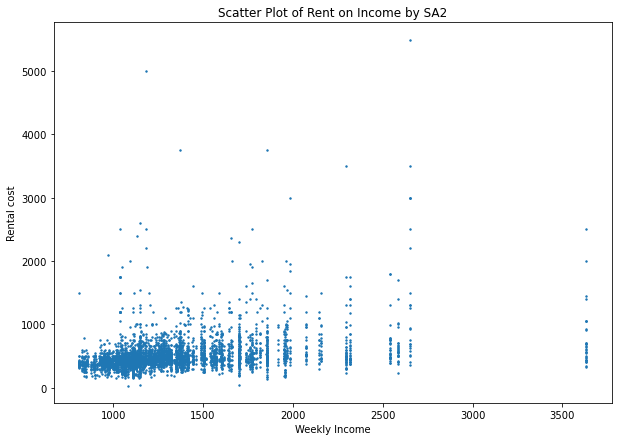

In [16]:
rent_income_sa2.plot(x="weekly_income", y=["cost_text"], kind = 'scatter', s=2\
    , figsize=(10,7), ylabel = 'Rental cost', xlabel = 'Weekly Income', title = 'Scatter Plot of Rent on Income by SA2')
plt.show()

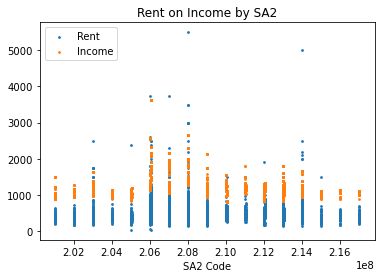

In [ ]:
plt.scatter(rent_income_sa2['SA2 code'], rent_income_sa2['cost_text'], s=3, label='Rent')
plt.scatter(rent_income_sa2['SA2 code'], rent_income_sa2['Mean Weekly $ 2019'], s=3, label='Income')
plt.xlabel('SA2 Code')
plt.title('Rent on Income by SA2')
plt.legend()

### Line Plot

In [ ]:
# aggregate df to get mean rental cost and income of SA2
rent_sa2 = rent_income_sa2[['SA2 code', 'cost_text', 'Mean Weekly $ 2019']]
mean_rent_income_sa2 = rent_sa2.groupby(['SA2 code']).mean().reset_index()
mean_rent_income_sa2


,SA2 code,cost_text,Mean Weekly $ 2019
0,201011001,423.421053,1224.4
1,201011002,398.928571,1497.6
2,201011005,410.000000,1216.5
3,201011006,440.000000,1054.7
4,201011008,357.916667,969.3
...,...,...,...
343,217031474,340.000000,1061.6
344,217031476,395.000000,893.2
345,217041477,300.000000,1068.7
346,217041479,367.142857,1078.8


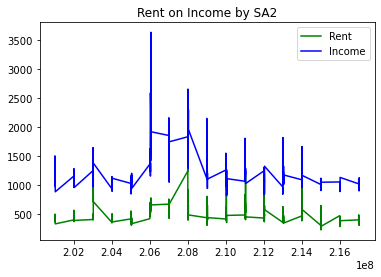

In [ ]:
# plot using line graph to show trends
plt.plot(mean_rent_income_sa2['SA2 code'], mean_rent_income_sa2['cost_text'], 'g', label='Rent')
plt.plot(mean_rent_income_sa2['SA2 code'], mean_rent_income_sa2['Mean Weekly $ 2019'], 'b', label='Income')
plt.title('Rent on Income by SA2')
plt.legend()

## <font color='brown'>Primary Modelling</font>

In [ ]:
# generate a simple linear model
fit_OLS = ols(
   formula = "cost_text ~  weekly_income",
   data = rent_income_sa2
).fit()

In [ ]:
# check the fit of the model
fit_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cost_text   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     522.1
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          2.10e-109
Time:                        23:32:24   Log-Likelihood:                -31402.
No. Observations:                4484   AIC:                         6.281e+04
Df Residuals:                    4482   BIC:                         6.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       209.2566     13.614     15.370      0.000     182.566     235.947
weekly_income     0.2231      0.010     22.850      0.000       0.204       0.242
==============================================================================
Omnibus:                     5198.373   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845347.884
Skew:                           5.876   Prob(JB):                         0.00
Kurtosis:                      69.231   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""